# Medir o Tempo de Execução

Vamos comparar o tempo de execução entre os método usuais do Python e método envolvendo numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Funções para Testar

In [10]:
def f1(x):
    return np.sin(x)


def f2(x):
    return 2 * x


# Executar a função com Python habitual
def mandar_fazer(func, xx):
    return [func(item) for item in xx]


# Executar a função para uma lista e para um array
M = 1000
x = [0.1 + i for i in range(M)]
xa = np.array(x)

f1l = mandar_fazer(f1, x)
f1a = f1(xa)

print(f1l[:5])
print(f1a[:5])

[0.09983341664682815, 0.8912073600614354, 0.8632093666488737, 0.04158066243329049, -0.8182771110644103]
[ 0.09983342  0.89120736  0.86320937  0.04158066 -0.81827711]


## Magia timeit do array

Podemos usar a magia %timeit do jupyter:

In [14]:
# Usamos %timeit -n N -r R -0 func, onde:
# -n N permite definir o número de loops que fazemos sobre cada função, usamos N grandes para funções muito curtas
# -r R permite definir o número de runs que fazemos, para fazer estatística sobre a função
# -o permite guardar o resultado numa variável, como uma classe com propriedades úteis
# func é a função que estamos a executar

resultado = %timeit -n 100 -r 10 -o f1(x)
resultado.average

131 µs ± 7.37 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


0.00013119439998990855

The slowest run took 5.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1.48 µs ± 777 ns per loop (mean ± std. dev. of 50 runs, 100 loops each)
1.33 µs ± 213 ns per loop (mean ± std. dev. of 50 runs, 100 loops each)
The slowest run took 7.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1.35 µs ± 809 ns per loop (mean ± std. dev. of 50 runs, 100 loops each)
1.39 µs ± 128 ns per loop (mean ± std. dev. of 50 runs, 100 loops each)
The slowest run took 6.37 times longer than the fastest. This could mean that an intermediate result is being cached.
1.56 µs ± 841 ns per loop (mean ± std. dev. of 50 runs, 100 loops each)
1.92 µs ± 503 ns per loop (mean ± std. dev. of 50 runs, 100 loops each)
The slowest run took 13.56 times longer than the fastest. This could mean that an intermediate result is being cached.
3.71 µs ± 4.31 µs per loop (mean ± std. dev. of 50 runs, 100 loops each)
The slowest run took 5

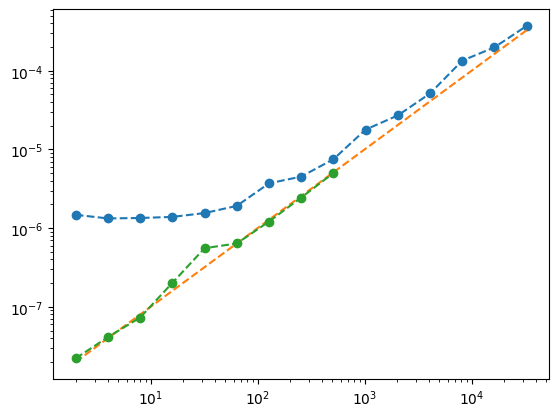

In [27]:
# Vamos ver o crescimento do tempo de execução da função com valores crescentes de M

MMmax = 16
MM = 2 ** np.arange(1, MMmax)

rra = np.zeros(MMmax - 1)
for i, M in enumerate(MM):
    x = [0.1 + i for i in range(M)]
    xa = np.array(x)
    r = %timeit -n 100 -r 50 -o f1(xa)
    rra[i] = r.average

plt.plot(MM, rra, "o--")
plt.plot(MM, 1e-8 * MM, "--")


# Vamos fazer o mesmo que acima mas para a função que envolve listas em vez de arrays
MMmax = 10
MM = 2 ** np.arange(1, MMmax)

rrl = np.zeros(MMmax - 1)
for i, M in enumerate(MM):
    x = [0.1 + i for i in range(M)]
    r = %timeit -n 100 -r 50 -o mandar_fazer(f1, x)
    rrl[i] = r.average

lentidao = 100 # O método com listas é cerca de 100 vezes mais lento
plt.plot(MM, rrl/lentidao, "o--")

# Mostrar o gráfico
plt.xscale("log")
plt.yscale("log")
plt.show()

Neste gráfico conseguimos ver que para valores pequenos de M o custo de computação fixo é a mais importante (corresponde ao custo de chamar a função). Para valores grandes de M o custo fixo é desprezável comparado com os custos variáveis.

### Interpretar Gráficos log-log
O gráfico acima tem ambos os eixos em escalas logaritmicas. Vamos supor que temos uma certa relação linear:

$$
y = mx
$$

Num gráfico log-log temos:
$$
\ln y = \ln(mx) = \ln m + \ln x
$$

Ou seja, obtemos sempre retas com o mesmo declive mas com ordenadas na origem diferentes.